In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Nama file Excel
file_names = ['perceraian2018.xlsx', 'perceraian2019.xlsx', 'perceraian2020.xlsx', 'perceraian2021.xlsx', 'perceraian2022.xlsx']

# Membaca setiap file Excel dan menyimpannya dalam sebuah DataFrame
dataframes = [pd.read_excel(file) for file in file_names]

In [3]:
# Menggabungkan DataFrame berdasarkan kolom 'Provinsi' dan menjumlahkan nilai-nilainya
merged_df = pd.concat(dataframes, ignore_index=True).groupby('Provinsi').sum().reset_index()

# Menyimpan hasil penggabungan ke dalam file Excel baru
merged_df.to_excel('perceraian2018-2022.xlsx', index=False)

# Menampilkan informasi tentang DataFrame hasil penggabungan
print("Jumlah baris dan kolom dataset hasil penggabungan:", merged_df.shape)

Jumlah baris dan kolom dataset hasil penggabungan: (35, 16)


In [4]:
merged_df

,Provinsi,Fakor Perceraian - Zina,Fakor Perceraian - Mabuk,Fakor Perceraian - Madat,Fakor Perceraian - Judi,Fakor Perceraian - Meninggalkan Salah satu Pihak,Fakor Perceraian - Dihukum Penjara,Fakor Perceraian - Poligami,Fakor Perceraian - Kekerasan Dalam Rumah Tangga,Fakor Perceraian - Cacat Badan,Fakor Perceraian - Perselisihan dan Pertengkaran Terus Menerus,Fakor Perceraian - Kawin Paksa,Fakor Perceraian - Murtad,Fakor Perceraian - Ekonomi,Fakor Perceraian - Lain-lain,Fakor Perceraian - Jumlah
0,Aceh,11.0,46.0,67.0,54.0,4117.0,345.0,131.0,533.0,83.0,21667.0,8.0,31.0,1521.0,161.0,28775.0
1,Bali,2.0,6.0,0.0,0.0,232.0,2.0,1.0,14.0,1.0,869.0,1.0,9.0,74.0,0.0,1211.0
2,Banten,43.0,634.0,203.0,425.0,6622.0,224.0,631.0,2404.0,46.0,43106.0,34.0,309.0,14154.0,0.0,68835.0
3,Bengkulu,12.0,39.0,9.0,47.0,1854.0,74.0,24.0,122.0,12.0,13637.0,19.0,25.0,1001.0,0.0,16875.0
4,DI Yogyakarta,33.0,93.0,15.0,40.0,4656.0,44.0,24.0,291.0,27.0,18673.0,25.0,95.0,4110.0,0.0,28126.0
5,DKI Jakarta,73.0,238.0,71.0,121.0,9772.0,187.0,149.0,1708.0,28.0,45287.0,12.0,272.0,13449.0,0.0,71367.0
6,Gorontalo,13.0,567.0,27.0,23.0,2088.0,12.0,41.0,234.0,0.0,7103.0,10.0,45.0,254.0,0.0,10417.0
7,Indonesia,4049.0,11019.0,3203.0,6942.0,248545.0,8474.0,5067.0,29600.0,2058.0,1155014.0,2863.0,6244.0,527117.0,7974.0,2018169.0
8,Jambi,18.0,85.0,35.0,87.0,2945.0,144.0,48.0,286.0,14.0,18349.0,8.0,51.0,1934.0,0.0,24004.0
9,Jawa Barat,176.0,934.0,139.0,768.0,27667.0,591.0,899.0,3052.0,139.0,188719.0,137.0,1005.0,172641.0,5291.0,402158.0


In [5]:
merged_df = merged_df[merged_df.index != 7].reset_index(drop=True)

In [6]:
merged_df.shape

(34, 16)

In [7]:
merged_df.isnull().sum()

Provinsi                                                          0
Fakor Perceraian - Zina                                           0
Fakor Perceraian - Mabuk                                          0
Fakor Perceraian - Madat                                          0
Fakor Perceraian - Judi                                           0
Fakor Perceraian - Meninggalkan Salah satu Pihak                  0
Fakor Perceraian - Dihukum Penjara                                0
Fakor Perceraian - Poligami                                       0
Fakor Perceraian - Kekerasan Dalam Rumah Tangga                   0
Fakor Perceraian - Cacat Badan                                    0
Fakor Perceraian - Perselisihan dan Pertengkaran Terus Menerus    0
Fakor Perceraian - Kawin Paksa                                    0
Fakor Perceraian - Murtad                                         0
Fakor Perceraian - Ekonomi                                        0
Fakor Perceraian - Lain-lain                    

In [8]:
merged_df.describe()

,Fakor Perceraian - Zina,Fakor Perceraian - Mabuk,Fakor Perceraian - Madat,Fakor Perceraian - Judi,Fakor Perceraian - Meninggalkan Salah satu Pihak,Fakor Perceraian - Dihukum Penjara,Fakor Perceraian - Poligami,Fakor Perceraian - Kekerasan Dalam Rumah Tangga,Fakor Perceraian - Cacat Badan,Fakor Perceraian - Perselisihan dan Pertengkaran Terus Menerus,Fakor Perceraian - Kawin Paksa,Fakor Perceraian - Murtad,Fakor Perceraian - Ekonomi,Fakor Perceraian - Lain-lain,Fakor Perceraian - Jumlah
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,119.088235,324.088235,94.205882,204.176471,7310.147059,249.235294,149.029412,870.588235,60.529412,33765.117647,84.205882,183.647059,15503.441176,234.529412,59357.911765
std,366.750379,400.208686,160.007534,288.500351,13699.905892,469.863685,209.741180,1298.078933,125.769687,52295.486715,234.896209,277.252962,42441.356198,943.755529,109516.403235
min,0.000000,5.000000,0.000000,0.000000,81.000000,0.000000,0.000000,7.000000,0.000000,317.000000,1.000000,2.000000,29.000000,0.000000,528.000000
25%,9.500000,40.750000,7.500000,25.750000,1240.000000,22.000000,16.250000,172.000000,3.000000,5341.500000,8.000000,26.500000,242.000000,0.000000,7822.250000
50%,23.500000,169.000000,33.500000,76.500000,3050.500000,136.000000,69.000000,327.500000,20.000000,18157.500000,17.500000,96.500000,1681.000000,0.000000,24346.500000
75%,69.250000,452.000000,100.000000,235.750000,6315.250000,308.000000,175.250000,1070.000000,44.500000,38645.750000,32.500000,196.250000,3912.000000,14.500000,49780.500000
max,2129.000000,1659.000000,858.000000,1249.000000,69708.000000,2663.000000,899.000000,6598.000000,654.000000,206776.000000,1179.000000,1134.000000,172641.000000,5291.000000,422308.000000


In [9]:
# Memilih kolom yang akan digunakan untuk klastering
columns_for_clustering = ['Fakor Perceraian - Zina', 'Fakor Perceraian - Mabuk', 'Fakor Perceraian - Madat',
                           'Fakor Perceraian - Judi', 'Fakor Perceraian - Meninggalkan Salah satu Pihak',
                           'Fakor Perceraian - Dihukum Penjara', 'Fakor Perceraian - Poligami',
                           'Fakor Perceraian - Kekerasan Dalam Rumah Tangga', 'Fakor Perceraian - Cacat Badan',
                           'Fakor Perceraian - Perselisihan dan Pertengkaran Terus Menerus',
                           'Fakor Perceraian - Kawin Paksa', 'Fakor Perceraian - Murtad',
                           'Fakor Perceraian - Ekonomi', 'Fakor Perceraian - Lain-lain']

# Memilih data yang akan digunakan untuk klastering
data_for_clustering = merged_df[columns_for_clustering]

In [10]:
# Standarisasi data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Menentukan jumlah klaster (gunakan metode elbow)
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_for_clustering_scaled)
    inertia_values.append(kmeans.inertia_)



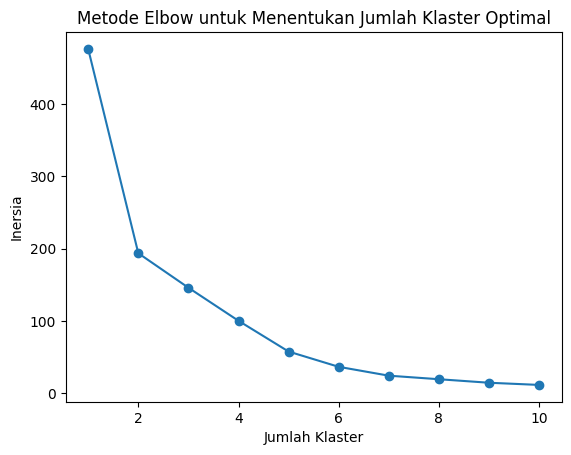

In [11]:
# Plot inersia untuk menentukan jumlah klaster optimal
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inersia')
plt.show()

# Berdasarkan hasil metode elbow, pilih jumlah klaster optimal
jumlah_klaster_optimal = 3  # Sesuaikan dengan hasil analisis elbow Anda



In [19]:
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=42)

In [20]:
y = kmeans.fit_predict(data_for_clustering_scaled)
print(y)

[0 0 4 0 0 4 0 0 1 3 2 0 4 0 4 0 0 0 4 0 0 4 0 0 0 0 0 6 0 0 0 0 4 5]


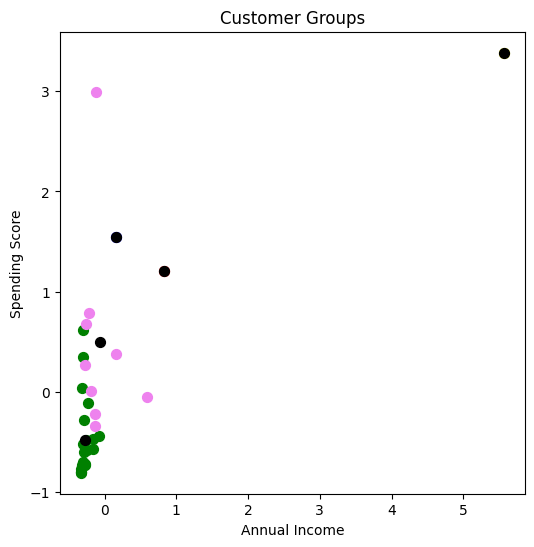

In [12]:
# Melakukan klastering dengan KMeans
kmeans = KMeans(n_clusters=jumlah_klaster_optimal, random_state=0)
merged_df['Klaster'] = kmeans.fit_predict(data_for_clustering_scaled)

# Menampilkan hasil klastering
print("Hasil Klastering:")
print(merged_df[['Provinsi', 'Klaster']])

Hasil Klastering:
                     Provinsi  Klaster
0                        Aceh        0
1                        Bali        0
2                      Banten        0
3                    Bengkulu        0
4               DI Yogyakarta        0
5                 DKI Jakarta        0
6                   Gorontalo        0
7                       Jambi        0
8                  Jawa Barat        1
9                 Jawa Tengah        1
10                 Jawa Timur        2
11           Kalimantan Barat        0
12         Kalimantan Selatan        0
13          Kalimantan Tengah        0
14           Kalimantan Timur        0
15           Kalimantan Utara        0
16  Kepulauan Bangka Belitung        0
17             Kepulauan Riau        0
18                    Lampung        0
19                     Maluku        0
20               Maluku Utara        0
21        Nusa Tenggara Barat        0
22        Nusa Tenggara Timur        0
23                      Papua        0
24     